## No rooted-out branching - Method 2

In [2]:
%run ../imports.py

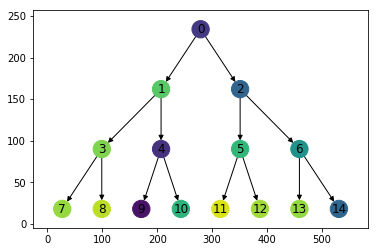

In [3]:
G = nx.balanced_tree(create_using=nx.DiGraph(), h=3, r=2)
N = nx.number_of_nodes(G)
layout = graphviz_layout(G, prog='dot')
#init = np.random.normal(loc=0, scale=4, size=N)
init = np.random.rand(N)
nx.draw_networkx(G, pos=layout, node_color=init, vmin=0, vmax=1)

Find root, $r$

In [3]:
root = [n for n,d in G.in_degree() if d==0][0]
root

0

Children of root, $\{ c_0, c_1 \}$

In [4]:
c = [n for n in G.neighbors(root)]
c

[1, 2]

Reverse the direction of an edge not connected to the root

G.remove_edge(1, 3)
G.add_edge(3,1)
nx.draw_networkx(G, pos=layout, node_color=init)

Simulate simple consensus

In [4]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

7

In [7]:
from scipy.integrate import solve_ivp

In [8]:
f1 = lambda t,x: np.asarray(-L.dot(x))[0]
res1 = solve_ivp(fun=f1, t_span=[0,10], y0=init)

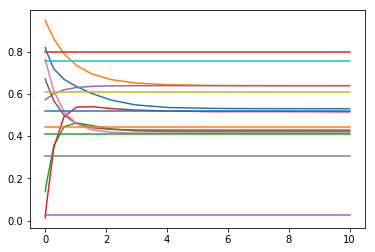

In [9]:
for i in np.arange(0,N):
    plt.plot(res1.t, res1.y[i,:])

In [10]:
res1.y[:,-1]

array([0.52958378, 0.63851709, 0.42063165, 0.51476073, 0.63850559,
       0.42815193, 0.41311311, 0.30327574, 0.60851645, 0.75616701,
       0.52084421, 0.44432986, 0.41197383, 0.80040296, 0.02582302])

### Symmetrization

In [5]:
Q = null_space(null_space(L).transpose()).transpose()
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [13]:
f2 = lambda t,x: -eqL.dot(x)
res2 = solve_ivp(fun=f2, t_span=[0,10], y0=init)

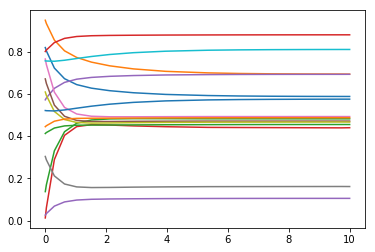

In [14]:
for i in np.arange(0,N):
    plt.plot(res2.t, res2.y[i,:], label=i)

Create undirected graph from the equivalent Laplacian

In [6]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [7]:
nx.is_connected(eqG)

True

In [8]:
np.sum(eqL, axis=1)

array([-9.7491e-16,  1.0807e-15, -1.9360e-15, -2.4700e-15, -3.8359e-15,
        2.0747e-15, -8.8818e-16,  9.5312e-16,  9.9508e-16,  1.5317e-15,
        1.4635e-15, -2.6368e-16, -3.1832e-16,  1.1102e-15,  9.9920e-16])

In [9]:
np.diag(eqL)

array([1.5635, 1.6901, 1.6901, 1.5915, 1.5915, 1.5915, 1.5915, 0.3363,
       0.3363, 0.3363, 0.3363, 0.3363, 0.3363, 0.3363, 0.3363])

In [10]:
res2.y[:,-1]

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/Cellar/ipython/7.3.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3291, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-e8f536bbb204>", line 1, in <module>
    res2.y[:,-1]
NameError: name 'res2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/ipython/7.3.0/libexec/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2033, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/Cellar/ipython/7.3.0/libexec/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1095, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offs

NameError: name 'res2' is not defined

Final result

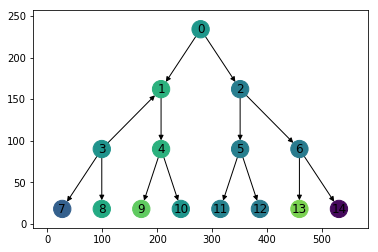

In [20]:
nx.draw_networkx(G, node_color = res1.y[:,-1], pos=layout, vmin=0, vmax=1)

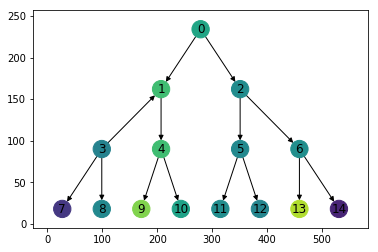

In [21]:
nx.draw_networkx(G, node_color = res2.y[:,-1], pos=layout, vmin=0, vmax=1)

In [22]:
np.linalg.matrix_rank(eqL)

7